In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
setfits = {'170201PMT1': {'a': 20.961661881805281,
  'aerr': 0.21389589800870334,
  'd': 12.024360086681172,
  'derr': 0.13462440437453471},
 '170201PMT2': {'a': 15.684367221368372,
  'aerr': 0.21687611481856772,
  'd': 13.415625198236272,
  'derr': 0.37974697846071814},
 '170313PMT1': {'a': 18.792757036544266,
  'aerr': 0.18263639795543449,
  'd': 12.263624572255571,
  'derr': 0.14316944870191606},
 '170313PMT2': {'a': 9.4117121962490273,
  'aerr': 0.098749782641482639,
  'd': 13.052525314208578,
  'derr': 0.099472291504685117}}

In [8]:
def gainpow(x, a, d):
    return a*(x/1000.0)**d
    
def gainpowerr(x, a, aerr, d, derr):
    return (x/1000.0)**d * np.sqrt( (aerr)**2 + (a*np.log(x/1000.0)*derr)**2 )

def gainextrapolator(set_name = '', voltage = '', verbose=False):
        a    = setfits[set_name]['a']
        aerr = setfits[set_name]['aerr']
        d    = setfits[set_name]['d']
        derr = setfits[set_name]['derr']
        x = voltage
        gain = gainpow(x, a, d)
        gainerr = gainpowerr(x, a, aerr, d, derr)
        if verbose: print("Extrapolated gain is " + str(round(gain, 3)) + " +-" + str(round(gainerr, 3)))
        return gain

In [9]:
# Pre cooling gain extrapolation
gainextrapolator(set_name = '170201PMT1', voltage = 575)
gainextrapolator(set_name = '170201PMT2', voltage = 725)

0.20980413514601398

In [15]:
# Post cooling gain extrapolation
# gainextrapolator(set_name = '170313PMT1', voltage = 575)
gainextrapolator(set_name = '170313PMT1', voltage = 850) * 1e6

2561006.625638467

In [16]:
gainextrapolator(set_name = '170313PMT2', voltage = 900) * 1e6

2379128.143411107

# Other stuff

In [6]:
def gainexp(x, a, d):
    return a*2**((x-1000)/d)

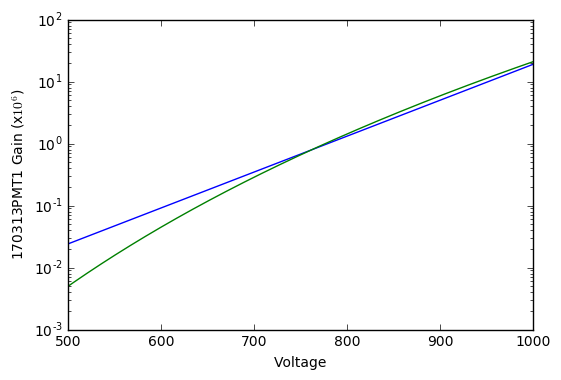

In [7]:
xlist = np.linspace(0,1000,1000)
ae = 19.023
de = 51.972
yexp = [gainexp(x, ae, de) for x in xlist]
ap = 20.962
dp = 12.024
ypow = [gainpow(x, ap, dp) for x in xlist]
plt.plot(xlist, yexp)
plt.plot(xlist, ypow)
plt.yscale('log')
plt.xlim(500, 1000)
plt.ylim(1e-3, 1e2)
plt.xlabel('Voltage')
plt.ylabel('170313PMT1 Gain (x$10^6$)')
plt.show()

In [ ]:
# setfits = {'170201PMT1': {'a': 21.224314613249888,
#   'aerr': 0.4030051437440344,
#   'd': 53.108714558044085,
#   'derr': 1.0821335352911126},
#  '170201PMT2': {'a': 15.74889181593406,
#   'aerr': 0.25679834384355804,
#   'd': 47.554300980649138,
#   'derr': 1.5505761322476683},
#  '170313PMT1': {'a': 19.022565970971623,
#   'aerr': 0.34618678311692352,
#   'd': 51.971637725790139,
#   'derr': 1.1097431799787225},
#  '170313PMT2': {'a': 9.7919666086832748,
#   'aerr': 0.13758541647647685,
#   'd': 47.917798733190516,
#   'derr': 0.47316378534303566}}